## Predicting Life Satisfaction
### Exploratory Data Analysis  
  
#### Objectives:  
* [Analysis of missing observations](#Analysis-of-Missing-Observations)
* [Analysis of categorical/numeric features](#Categorical-and-Numeric-Variables)
* [Correlation analysis](#Correlation-Analysis)
* [1 way/ 2 way variable plots (histograms, scatterplots, etc.)](#Visualizations)

### From Kaggle:
  
#### File descriptions  
* train.csv - the training set with some preprocesssing of values.  
* train_raw.csv - the training set with original responses (no preprocessing).  
  
#### Data fields
* v1-v270 - survey response fields
* cntry - survey respondent country
* satisfied - whether (1) or not (0) the survey respondent is 'very satisfied' with their life (training set only)

In [1]:
# Import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set options
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
# Import data
train_raw = pd.read_csv("../01-data/train_raw.csv", low_memory = False)
train = pd.read_csv("../01-data/train.csv", low_memory = False)

# Custom data
codebook = pd.read_csv("../01-data/codebook_compact.csv", low_memory = False) # OG codebook+dtypes from codebook_long

### Comparing processed vs. unprocessed data

In [3]:
display(train_raw.head())
train_raw.shape

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v141,v142,v143,v144,v145,v146,v147,v148,v149,v150,v151,v152,v153,v154,v155,v156,v157,v158,v159,v160,v161,v162,v163,v164,v165,v166,v167,v168,v169,v170,v171,v172,v173,v174,v175,v176,v177,v178,v179,v180,v181,v182,v183,v184,v185,v186,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v201,v202,v203,v204,v205,v206,v207,v208,v209,v210,v211,v212,v213,v214,v215,v216,v217,v218,v219,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v231,v232,v233,v234,v235,v236,v237,v238,v239,v240,v241,v242,v243,v244,v245,v246,v247,v248,v249,v250,v251,v252,v253,v254,v255,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,v270,cntry,satisfied
0,9948,2,Safe,74,Austrian nfs,No second ancestry,No,No,No,No,Yes,Yes,Does not,Some of the time,Yes,Not marked,Not marked,66,No,2,AT33,No,No,Not applicable,Yes,66,Not marked,Not marked,Not marked,Not marked,Marked,Not marked,Not marked,Not marked,Not marked,Town or small city,Not marked,Not marked,Not marked,Not marked,Not marked,Not marked,Not marked,No,Not marked,Not marked,Marked,Not marked,Not marked,Not marked,Not marked,Not marked,Not marked,No,Not marked,Not marked,Upper secondary education completed (ISCED 3),"Vocational ISCED 3A, access ISCED 5B/ lower ti...",Upper secondary education completed (ISCED 3),"Vocational ISCED 3A, access ISCED 5B/ lower ti...",Upper secondary education completed (ISCED 3),"Vocational ISCED 3A, access ISCED 5B/ lower ti...",Not applicable,Not applicable,10,"ES-ISCED IIIb, lower tier upper secondary","ES-ISCED IIIb, lower tier upper secondary","ES-ISCED IIIb, lower tier upper secondary",Not applicable,Not applicable,Employee,Not applicable,Employee,Employee,Some of the time,10 to 24,9,Yes,66,Some of the time,None or almost none of the time,Most of the time,All or almost all of the time,Neither agree nor disagree,Neither agree nor disagree,Female,NaN,NaN,NaN,NaN,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,NaN,5,Good,1,Coping on present income,Pensions,Pensions,R - 2nd decile,Yes to some extent,Not marked,Not marked,Yes,Bad for the economy,Allow a few,Allow a few,Somewhat like me,Somewhat like me,Like me,Somewhat like me,Not like me at all,Somewhat like me,Like me,Allow some,2,Worse place to live,None,NaN,1,1,12,2,4,4,9,25,107.0,2015,2015,4,Not like me,Somewhat like me,A little like me,Very much like me,Not like me,Somewhat like me,Somewhat like me,Like me,Like me,Somewhat like me,Not like me,Like me,Not like me at all,Not like me,Office supervisors,Not applicable,Yes,Not applicable,GER,0,3,No,Not applicable,Widowed/civil partner died,Widowed/civil partner died,66,"Yes, previously",Retired,Not applicable,Yes,Face to face interview,Manufacture of other non-metallic mineral prod...,20,Sales occupations,Sales occupations,Does not,No,Yes,1993,Not marked,Not marked,Hardly interested,Most people try to be fair,People mostly try to be helpful,8,Every day,Quite close,2,2,NUTS level 2,Never,Yes,Not applicable,1,Roman Catholic,Not applicable,NaN,NaN,NaN,NaN,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,NaN,NaN,NaN,NaN,NaN,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,NaN,Not applicable,Marked,Not marked,Less than most,Several times a month,No,None or almost none of the time,3,Don't know,5,1,

(30080, 273)

In [4]:
train_raw.describe()

,id,v129,v132,v134,satisfied
count,30080.000000,30080.000000,28845.000000,30080.000000,30080.000000
mean,19702.757015,7.743085,57.399827,2014.436336,0.519481
std,11357.684769,3.596224,20.710074,0.495939,0.499629
min,1.000000,1.000000,0.000000,2014.000000,0.000000
25%,9856.750000,5.000000,45.000000,2014.000000,0.000000
50%,19759.500000,9.000000,54.000000,2014.000000,1.000000
75%,29515.250000,11.000000,67.000000,2015.000000,1.000000
max,39324.000000,12.000000,772.000000,2015.000000,1.000000


In [5]:
display(train.head())
train.shape

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v141,v142,v143,v144,v145,v146,v147,v148,v149,v150,v151,v152,v153,v154,v155,v156,v157,v158,v159,v160,v161,v162,v163,v164,v165,v166,v167,v168,v169,v170,v171,v172,v173,v174,v175,v176,v177,v178,v179,v180,v181,v182,v183,v184,v185,v186,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v201,v202,v203,v204,v205,v206,v207,v208,v209,v210,v211,v212,v213,v214,v215,v216,v217,v218,v219,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v231,v232,v233,v234,v235,v236,v237,v238,v239,v240,v241,v242,v243,v244,v245,v246,v247,v248,v249,v250,v251,v252,v253,v254,v255,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,v270,cntry,satisfied
0,9948,2,2,74,11010,.a,2,2,2,2,1,1,2,2,1,0,0,66,2,2,AT33,2,2,.a,1,66,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,3,322,3,322,3,322,.a,.a,10,3,3,3,.a,.a,1,.a,1,1,2,2,9,1,66,2,1,3,4,3,3,2,NaN,NaN,NaN,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,5,2,1,2,3,4,2,2,0,0,1,0,3,3,3,3,2,3,6,3,2,2,2,0,0,NaN,1,1,12,2,4,4,9,25,107.0,2015,2015,4,5,3,4,1,5,3,3,2,2,3,5,2,6,5,3341,.a,1,.a,GER,0,3,2,.a,5,5,66,2,6,.a,1,1,23,20,4,4,2,2,1,1993,0,0,3,10,10,8,1,2,2,2,2,7,1,.a,1,1,.a,NaN,NaN,NaN,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,NaN,NaN,NaN,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,.a,1,0,2,4,2,1,3,.b,5,1,9,1,4,2015,4,0,5,10,0,2,0,3,0,1,.a,2,.a,0,0,0,0,1,8,40,40,.a,2,2,1,2,2,1941,NaN,NaN,NaN,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,AT,0
1,25601,4,2,58,11010,.a,2,2,2,2,1,2,2,2,2,0,0,66,2,2,AT31,2,2,.a,1,66,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,.a,0,0,3,322,2,212,2,212,.a,.a,12,3,2,2,.a,.a,1,.a,1,1,2,2,5,1,66,2,1,1,1,5,3,1,NaN,NaN,NaN,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,4,3,1,2,4,5,2,3,0,0,1,6,3,2,4,3,3,4,4,4,4,1,5,4,2,NaN,17,17,19,15,1,1,17,46,75.0,2015,2015,3,4,3,3,1,1,4,2,2,3,2,2,3,3,1,7132,.a,2,.a,GER,0,5,.b,.a,6,6,66,3,3,.a,1,1,25,.a,8,8,2,2,1,2014,0,0,4,4,7,3,6,.a,4,5,2,5,1,.a,1,1,.a,NaN,NaN,NaN,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,NaN,NaN,NaN,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,.a,0,0,3,4,2,1,5,3,8,5,8,17,1,2015,4,.b,7,7,.b,5,5,.b,1,3,2,1,1,1,0,0,0,1,3,39,39,.a,2,2,2,2,2,1957,NaN,NaN,NaN,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,AT,0
2,8592,6,2,47,11010,11010,2,2,1,2,1,.a,1,1,2,0,0,66,2,3,AT33,2,.a,.a,1,66,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,2,212,2,212,2,212,3,322,9,2,2,2,3,.a,1,1,1,1,4,1,2,1,66,1,1,1,1,1,3,2,NaN,NaN,NaN,NaN,1,2,2,.a,.a,.a,.a,NaN,10,2,4,2,1,1,1,3,0,0,1,5,2,3,5,2,2,3,5,2,2,2,5,3,6,NaN,18,18,17,28,3,3,16,30,50.0,2015,2015,2,5,2,1,2,5,2,2,2,2,2,5,2,5,4,9112,.d,1,.a,GER,0,4,.d,.a,1,.a,66,3,1,.a,1,1,56,1,1,8,1,2,.a,.a,1,1,3,9,8,8,2,.a,3,2,2,3,1,.a,8,1,.a,NaN,NaN,NaN,NaN,1,2,2,.a,.a,.a,.a,NaN,NaN,NaN,NaN,NaN,1,2,2,.a,.a,.a,.a,NaN,1,0,0,2,5,2,1,6,6,8,6,8,18,3,2015,4,5,9,9,8,5,6,4,5,6,.a,2,.a,0,0,0,0,1,8,30,35,40,4,2,1,2,2,1968,NaN,NaN,NaN,NaN,1963,1993,1995,.a,.a,.a,.a,NaN,AT,1
3,29593,10,2,22,11010,.a,2,2,2,2,1,2,2,2,2,0,0,66,2,10,AT12,2,.a,.a,1,66,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,3,322,3,322,3,322,.a,.a,6,3,3,3,.a,.a,1,.a,1,1,3,2,0,1,66,1,2,2,1,1,1,1,NaN,NaN,NaN,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,8,1,1,2,1,1,2,3,1,0,1,0,4,4,2,2,2,1,3,1,1,4,0,0,3,NaN,7,7,8,46,4,4,7,51,44.0,2015,2015,0,1,4,2,6,3,1,4,1,3,2,3,1,3,6,7231,.a,2,.a,GER,0,10,1,1,4,4,66,3,1,.a,1,1,45,.a,6,5,2,2,.a,.a,1,0,3,5,0,5,7,.a,0,0,2,6,1,.a,5,1,.a,NaN,NaN,NaN,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,NaN,NaN,NaN,NaN,.a,.a,.a,.a,.a,.a,.a,NaN,.a,0,0,3,6,2,1,0,0,0,0,8,7,4,2015,4,0,0,0,0,0,0,0,0,7,.a,2,.a,0,0,0,0,2,0,40,50,.a,3,2,1,2,2,1993,NaN,NaN,NaN,N

(30080, 273)

In [6]:
train.describe()

,id,v15,v16,v26,v27,v28,v29,v30,v31,v32,v33,v34,v36,v37,v38,v39,v40,v41,v42,v44,v45,v46,v47,v48,v49,v50,v51,v52,v54,v55,v106,v107,v123,v129,v132,v134,v175,v176,v185,v217,v218,v244,v245,v246,v247,satisfied
count,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.00000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,2388.000000,30080.000000,28845.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000,30080.000000
mean,19702.757015,0.001895,0.000332,0.000465,0.001363,0.000831,0.003424,0.408477,0.014761,0.005652,0.000831,0.001629,0.034874,0.013863,0.013497,0.000898,0.007447,0.010273,0.010505,0.012234,0.000133,0.916390,0.020445,0.018384,0.01373,0.000233,0.016888,0.005751,0.099701,0.012467,0.142121,0.084309,1.675461,7.743085,57.399827,2014.436336,0.522939,0.357513,2.402926,0.271243,0.147141,0.042553,0.019049,0.019847,0.008045,0.519481
std,11357.684769,0.043490,0.018230,0.021569,0.036895,0.028818,0.058417,0.491560,0.120595,0.074966,0.028818,0.040329,0.183463,0.116924,0.115393,0.029947,0.085974,0.100834,0.101957,0.109931,0.011531,0.276807,0.141521,0.134339,0.11637,0.015253,0.128855,0.075620,0.299606,0.110958,0.349180,0.277855,0.468301,3.596224,20.710074,0.495939,0.499482,0.479276,0.806457,0.444609,0.354252,0.201851,0.136700,0.139477,0.089335,0.499629
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2014.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9856.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,45.000000,2014.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19759.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,54.000000,2014.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,29515.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,11.000000,67.000000,2015.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,39324.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,12.000000,772.000000,2015.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We are missing many numeric summaries because those columns are being misclassified as Object/Character.

In [7]:
# Proper type names
codebook = codebook.replace({'double': 'float', 'string': 'str'})

# Convert to dict
dtype_dict = dict(zip(codebook.Variable,codebook.Type_codebook_long))

We can't convert to float yet, since .a, .b, .c values will throw an error. Definitions of these values are not consistent between survey responses, e.g. while .a corresponds to "Refusal" for some questions, .b corresponds to "Refusal" for others. 

### Analysis of Missing Observations

In [8]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})

# Columns where % missing not equal 0 
missing_value_df[missing_value_df.percent_missing > 0]

,column_name,percent_missing
v58,v58,4.428191
v59,v59,4.428191
v60,v60,4.428191
v61,v61,4.428191
v62,v62,4.428191
v63,v63,4.428191
v66,v66,4.428191
v67,v67,4.428191
v68,v68,4.428191
v86,v86,38.075133


Note that this is not including .a, .b, .c, .d values. Second analysis including these:

In [9]:
train_nodots = train.replace([".", ".a", ".b", ".c", ".d"], [np.nan, np.nan, np.nan, np.nan, np.nan])

In [10]:
percent_missing_nodots = train_nodots.isnull().sum() * 100 / len(train_nodots)
missing_value_df_nodots = pd.DataFrame({'column_name': train_nodots.columns,
                                 'percent_missing': percent_missing_nodots})

# Columns where % missing not equal 0 
missing_value_df_nodots[missing_value_df_nodots.percent_missing > 0]

,column_name,percent_missing
v1,v1,1.908245
v2,v2,1.053856
v3,v3,0.239362
v4,v4,0.668218
v5,v5,70.671543
v6,v6,0.601729
v7,v7,0.236037
v8,v8,0.478723
v9,v9,1.389628
v10,v10,0.023271


In [11]:
percent = 30
cols_missing = missing_value_df_nodots[missing_value_df_nodots.percent_missing > percent]
n_cols_missing = len(missing_value_df_nodots[missing_value_df_nodots.percent_missing > percent])

In [12]:
print("There are " + str(n_cols_missing) + " features with over " + str(percent) + "% missing.")

There are 71 features with over 30% missing.


In [13]:
# Attach short desc for more context
codebook_labels = ['Variable', "Label"]
cols_missing.merge(codebook[codebook_labels], left_on = 'column_name', right_on = "Variable", how = "left")

,column_name,percent_missing,Variable,Label
0,v5,70.671543,v5,"Second ancestry, European Stan..."
1,v11,35.954122,v11,Ever had children living in ho...
2,v22,52.446809,v22,Control paid work last 7 days
3,v23,77.140957,v23,"Partner, control paid work las..."
4,v62,44.561170,v62,Partner's highest level of edu...
5,v63,44.561170,v63,Partner's highest level of edu...
6,v68,44.561170,v68,Partner's highest level of edu...
7,v69,89.704122,v69,Number of employees respondent...
8,v71,63.710106,v71,Partner's employment relation
9,v86,99.883644,v86,Gender of tenth person in hous...


Many of these have to be with characteristics of 3rd+ person in family - likely majority are 1-2 people families.

Let's drop these columns for the remainder of the analysis:

In [14]:
drop_missing = cols_missing.column_name.tolist()
train_v2 = train_nodots.drop(drop_missing, axis = 1)

### Categorical and Numeric Variables

#### "Categorical" (i.e. strings)

Most of the features in this data are categorical (not continuous), but many have already been preprocessed and converted to double.

Let's deal with the NaN values (all . variables were grouped together above), 0 is taken so they'll be coded as -1:

In [15]:
train_v3 = train_v2.replace([np.nan], [-1])
train_v3.head(5)

,id,v1,v2,v3,v4,v6,v7,v8,v9,v10,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v64,v65,v66,v67,v70,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v90,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v141,v142,v143,v144,v145,v146,v147,v148,v149,v150,v152,v154,v155,v156,v157,v159,v161,v162,v163,v165,v166,v167,v169,v171,v172,v175,v176,v177,v178,v179,v180,v181,v183,v184,v185,v186,v187,v189,v196,v208,v217,v218,v219,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v231,v232,v233,v234,v235,v236,v237,v238,v239,v240,v242,v244,v245,v246,v247,v248,v249,v250,v251,v253,v254,v255,v256,v257,v258,v263,cntry,satisfied
0,9948,2,2,74,11010,2,2,2,2,1,2,2,1,0,0,66,2,2,AT33,2,1,66,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,3,322,3,322,3,322,10,3,3,3,1,1,1,2,2,9,1,66,2,1,3,4,3,3,2,-1,5,2,1,2,3,4,2,2,0,0,1,0,3,3,3,3,2,3,6,3,2,2,2,0,0,1,1,12,2,4,4,9,25,107.0,2015,2015,4,5,3,4,1,5,3,3,2,2,3,5,2,6,5,3341,1,GER,0,3,2,5,66,2,6,1,1,23,4,2,2,0,0,3,10,10,8,1,2,2,2,7,1,1,-1,-1,1,0,2,4,2,1,3,-1,5,1,9,1,4,2015,4,0,5,10,0,2,0,3,0,1,2,0,0,0,0,1,8,40,40,2,2,1,2,2,1941,-1,AT,0
1,25601,4,2,58,11010,2,2,2,2,1,2,2,2,0,0,66,2,2,AT31,2,1,66,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,-1,0,0,3,322,2,212,2,212,12,3,2,2,1,1,1,2,2,5,1,66,2,1,1,1,5,3,1,-1,4,3,1,2,4,5,2,3,0,0,1,6,3,2,4,3,3,4,4,4,4,1,5,4,2,17,17,19,15,1,1,17,46,75.0,2015,2015,3,4,3,3,1,1,4,2,2,3,2,2,3,3,1,7132,2,GER,0,5,-1,6,66,3,3,1,1,25,8,2,2,0,0,4,4,7,3,6,4,5,2,5,1,1,-1,-1,0,0,3,4,2,1,5,3,8,5,8,17,1,2015,4,-1,7,7,-1,5,5,-1,1,3,1,1,0,0,0,1,3,39,39,2,2,2,2,2,1957,-1,AT,0
2,8592,6,2,47,11010,2,2,1,2,1,1,1,2,0,0,66,2,3,AT33,2,1,66,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,2,212,2,212,2,212,9,2,2,2,1,1,1,4,1,2,1,66,1,1,1,1,1,3,2,1,10,2,4,2,1,1,1,3,0,0,1,5,2,3,5,2,2,3,5,2,2,2,5,3,6,18,18,17,28,3,3,16,30,50.0,2015,2015,2,5,2,1,2,5,2,2,2,2,2,5,2,5,4,9112,1,GER,0,4,-1,1,66,3,1,1,1,56,1,1,2,1,1,3,9,8,8,2,3,2,2,3,1,8,1,1,0,0,2,5,2,1,6,6,8,6,8,18,3,2015,4,5,9,9,8,5,6,4,5,6,2,0,0,0,0,1,8,30,35,4,2,1,2,2,1968,1963,AT,1
3,29593,10,2,22,11010,2,2,2,2,1,2,2,2,0,0,66,2,10,AT12,2,1,66,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,3,322,3,322,3,322,6,3,3,3,1,1,1,3,2,0,1,66,1,2,2,1,1,1,1,-1,8,1,1,2,1,1,2,3,1,0,1,0,4,4,2,2,2,1,3,1,1,4,0,0,3,7,7,8,46,4,4,7,51,44.0,2015,2015,0,1,4,2,6,3,1,4,1,3,2,3,1,3,6,7231,2,GER,0,10,1,4,66,3,1,1,1,45,6,2,2,1,0,3,5,0,5,7,0,0,2,6,1,5,-1,-1,0,0,3,6,2,1,0,0,0,0,8,7,4,2015,4,0,0,0,0,0,0,0,0,7,2,0,0,0,0,2,0,40,50,3,2,1,2,2,1993,-1,AT,0
4,4252,0,1,24,11010,2,2,2,2,1,2,1,1,0,0,66,1,2,AT12,2,1,66,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,4,423,3,322,3,322,13,5,3,3,1,1,3,4,2,8,1,66,1,1,1,1,1,1,1,-1,8,1,1,1,1,1,3,3,0,0,1,7,2,2,6,1,2,3,4,1,6,2,7,8,3,29,29,19,20,3,3,18,25,42.0,2015,2015,6,6,2,2,1,3,2,2,1,2,3,3,2,3,3,4311,2,GER,0,4,2,6,66,3,1,1,1,66,6,2,2,1,0,2,6,8,5,6,5,5,2,5,1,5,-1,-1,0,0,3,6,1,2,9,6,8,6,8,29,3,2015,4,2,6,9,7,7,7,5,2,4,2,0,0,0,0,1,8,38,38,1,2,1,2,2,1991,-1,AT,1


Most of the variables have already been encoded via the preprocessing. The variables identified to be strings, according to codebook_long are: v17, v20, v25, v78, v154, v155, v161, cntry - these are all country/region codes or language codes.

In [16]:
cat_cols = ['v17', "v20", "v25", "v78", "v154", "v155", "v161", "cntry"]
cat_df = train_v3[cat_cols]

Checking unique values and counts of these features:

In [17]:
# v17 is mostly "66" - is this a "missing" indicator? One 6 which is likely miscoded 66, get index to drop later
# cat_df.index[cat_df['v17'] == "6"].tolist()
# v20 looks fine
# v25 mostly 66. One 6
# cat_df.index[cat_df['v25'] == "6"].tolist()
# v78 is mostly 66, some stray numbers 2,4,3,77, one 6
# cat_df.index[cat_df['v78'] == "6"].tolist()
# v154 looks fine 
# v155 mostly 0 or 999 - "missing" indicators?
# v161 is mostly 66, some stray numbers
# cntry looks fine

# Index 4483 contains many missing/miscoded entries - drop
train_v4 = train_v3.drop(4483)

We will need to decide what to do with these variables - label encode/one-hot (this would make the data very wide). Also, since they are all country/region/language codes, it is likely we will see high correlations once encoded - maybe select which to keep first, then encode the remainder?

#### "Numeric" (i.e. features that have been fully encoded with only integer values)

In [18]:
# Convert all the other features to int64 (some are strings currently)
num_cols = train_v4.loc[:, ~train_v4.columns.isin(cat_cols)].columns.tolist()
train_v5 = train_v4.copy()
train_v5[num_cols] = train_v4[num_cols].astype('int64')

In [19]:
train_v5.describe()

,id,v1,v2,v3,v4,v6,v7,v8,v9,v10,v12,v13,v14,v15,v16,v18,v19,v21,v24,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v64,v65,v66,v67,v70,v72,v73,v74,v75,v76,v77,v79,v80,v81,v82,v83,v84,v85,v90,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v141,v142,v143,v144,v145,v146,v147,v148,v149,v150,v152,v156,v157,v159,v162,v163,v165,v166,v167,v169,v171,v172,v175,v176,v177,v178,v179,v180,v181,v183,v184,v185,v186,v187,v189,v196,v208,v217,v218,v219,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v231,v232,v233,v234,v235,v236,v237,v238,v239,v240,v242,v244,v245,v246,v247,v248,v249,v250,v251,v253,v254,v255,v256,v257,v258,v263,satisfied
count,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.00000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.00000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.00000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000,30079.000000
mean,19702.339838,3.550018,1.894810,49.319558,15493.313707,1.675820,1.906380,1.788723,1.893946,1.112105,1.645733,1.534293,1.436118,0.001895,0.000332,1.830945,3.802154,1.827188,1.050234,0.000465,0.001363,0.000831,0.003424,0.408458,0.014761,0.005652,0.000831,0.001629,2.842814,0.034875,0.013863,0.013498,0.000898,0.007447,0.010273,0.010506,1.890854,0.012234,0.000133,0.916387,0.020446,0.018385,0.013731,0.000233,0.016889,0.005752,1.816982,0.099671,0.012467,3.432627,394.340437,2.234981,261.606170,2.148276,242.506367,12.749260,4.014329,2.524918,2.411018,0.974201,1.432195,1.874597,2.897

### Correlation Analysis

We will perform this on only those variables which have been fully encoded thus far.

In [20]:
numeric_df = train_v5[num_cols]

In [21]:
# Correlation matrix is too huge so isolating high absolute correlation pairs 

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")

corr_df = get_top_abs_correlations(numeric_df, 30).to_frame().reset_index().rename(columns={0: "abs_corr"})
corr_df = corr_df.merge(codebook[codebook_labels], left_on = 'level_0', right_on = "Variable", how = "left").drop("Variable", axis = 1).rename(columns = {"Label":"label_0"})
corr_df = corr_df.merge(codebook[codebook_labels], left_on = 'level_1', right_on = "Variable", how = "left").drop("Variable", axis = 1).rename(columns = {"Label":"label_1"})
corr_df

Top Absolute Correlations


,level_0,level_1,abs_corr,label_0,label_1
0,v128,v129,0.998224,"End of interview, month","Start of interview, month"
1,v124,v125,0.996107,"End of interview, day of month","Start of interview, day of month"
2,v196,v208,0.995009,Second person in household: re...,Second person in household: re...
3,v57,v65,0.991022,Highest level of education,"Highest level of education, ES..."
4,v102,v103,0.990102,Main source of household income,Main source of household income
5,v58,v66,0.989494,Father's highest level of educ...,Father's highest level of educ...
6,v59,v66,0.989159,Father's highest level of educ...,Father's highest level of educ...
7,v60,v67,0.987781,Mother's highest level of educ...,Mother's highest level of educ...
8,v61,v67,0.984702,Mother's highest level of educ...,Mother's highest level of educ...
9,v58,v59,0.982498,Father's highest level of educ...,Father's highest level of educ...


* v128 and 129 are "Start of interview, month" and "End of interview, month" respectively
* v124 and v125 are "End of interview, day of month" and "Start of interview, day of month" respectively
* v196 and v208 are BOTH "Second person in household: relationship to respondent" - but why are they not equal?
* v57 and v65 are "Highest level of education" and "Highest level of education, ES - ISCED"
* v102 and v103 BOTH "Main source of household income". v103 contains more info because it breaks down income from/excluding farming
* v58 and v66 BOTH father's level of education, again with the ES - ISCED codes
* v59 and v66 similar to above, i.e. there are THREE "Father's level of education" variables
* v60, v61 and v67 same thing but mother's
* v56, v65 same thing but self
* v128, 129, 124, 125, 228, 229 are ALL day of month/month/hour variables with high correlations
* v30, v171 "Partner doing last 7 days" and "Lives with partner at household grid"
* v90, v263 "Gender of 2nd person in household" and "Year of birth of second person in household" - why are these so highly correlated?
* v108, v254 "Have a set basic or contracted number of hours" "Paid work in another country, period more than 6 months last 10 years"
* v235, v237 "Trust in politicians", "Trust in political parties"
* v70, v254 "Employment relation", "Paid work in another country..."

Correlation not as severe for the remaining pairs, so I won't look into them.  
We will need to decide what to do with these pairs (of the columns with basically the same info, which do we want to keep).

Isolating high correlations with the target variable:

In [22]:
corr_matrix = numeric_df.corr()

print("Top positive correlations with target")
pos_corr = pd.DataFrame(corr_matrix["satisfied"].sort_values(ascending=False)[0:10])
pos_corr.merge(codebook[codebook_labels], left_index = True, right_on = "Variable", how = "left")

Top positive correlations with target


,satisfied,Variable,Label
272,1.000000,satisfied,Target
97,0.547952,v98,How happy are you
223,0.327189,v224,How satisfied with present sta...
73,0.322694,v74,"Enjoyed life, how often past week"
252,0.316676,v253,"Were happy, how often past week"
222,0.270685,v223,How satisfied with the way dem...
177,0.250165,v178,Most people try to take advant...
179,0.250016,v180,Most people can be trusted or ...
232,0.235280,v233,Trust in the legal system
225,0.229284,v226,How satisfied with the nationa...


In [23]:
print("Top negative correlations with target")
neg_corr = pd.DataFrame(corr_matrix["satisfied"].sort_values(ascending=True)[0:10])
neg_corr.merge(codebook[codebook_labels], left_index = True, right_on = "Variable", how = "left")

Top negative correlations with target


,satisfied,Variable,Label
100,-0.319063,v101,Feeling about household's inco...
78,-0.291363,v79,"Felt depressed, how often past..."
98,-0.277223,v99,Subjective general health
81,-0.263764,v82,"Felt sad, how often past week"
80,-0.235305,v81,"Felt lonely, how often past week"
79,-0.203810,v80,"Felt everything did as effort,..."
12,-0.198201,v13,"Could not get going, how often..."
221,-0.172973,v222,"Sleep was restless, how often ..."
1,-0.162184,v2,Feeling of safety of walking a...
133,-0.145847,v134,"Start of interview, year"


### Visualizations

Let's start with the target variable (satisfied):

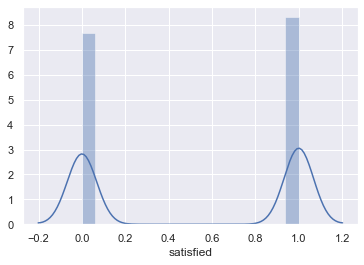

In [24]:
sns.set()
sns.distplot(train_v5.satisfied);

We have relatively balanced classes, with slightly more 1's than 0's.

Plotting those high correlation pairs against the target (top 3 negative and positive):

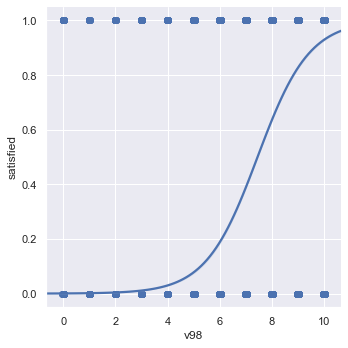

In [25]:
# This takes a while to run
plot_v98 = train_v5[train_v5.v98 != -1]
sns.lmplot(x = "v98", y = "satisfied", data = plot_v98, x_jitter=.03, logistic = True);

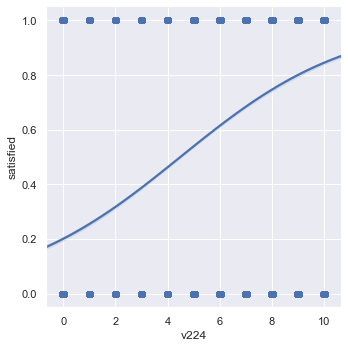

In [26]:
plot_v224 = train_v5[train_v5.v224 != -1]
sns.lmplot(x = "v224", y = "satisfied", data = plot_v224, x_jitter=.03, logistic = True);

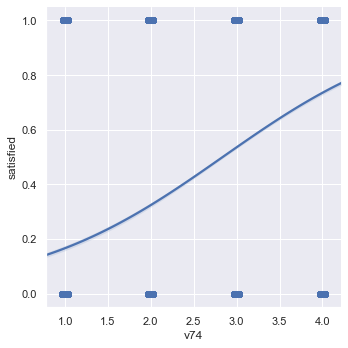

In [27]:
plot_v74 = train_v5[train_v5.v74 != -1]
sns.lmplot(x = "v74", y = "satisfied", data = plot_v74, x_jitter=.03, logistic = True);

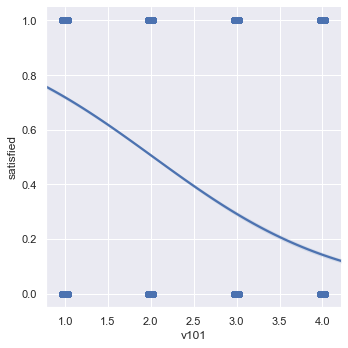

In [28]:
plot_v101 = train_v5[train_v5.v101 != -1]
sns.lmplot(x = "v101", y = "satisfied", data = plot_v101, x_jitter=.03, logistic = True);

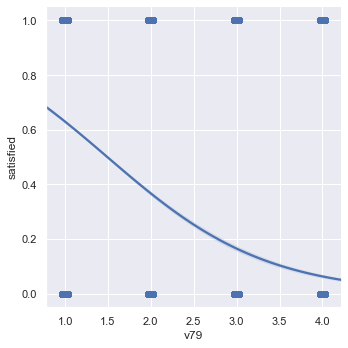

In [29]:
plot_v79 = train_v5[train_v5.v79 != -1]
sns.lmplot(x = "v79", y = "satisfied", data = plot_v79, x_jitter=.03, logistic = True);

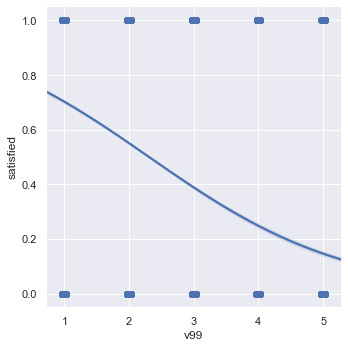

In [30]:
plot_v99 = train_v5[train_v5.v99 != -1]
sns.lmplot(x = "v99", y = "satisfied", data = plot_v99, x_jitter=.03, logistic = True);

Pairwise plots:

In [ ]:
# take a 5% sample as this is computationally expensive
df_sample = train_v5[num_cols].sample(frac=0.05)

# Pairwise plots
sns.pairplot(df_sample, hue="satisfied")